Сделайте копию ноутбука (файл => создать копию на диске). Переименуйте, добавив в название ФИО и номер группы


## Задание 1.1

### Подготовка

Скачайте цветную картинку (нужно вписать URL)

In [1]:
! wget https://i.playground.ru/p/P2VaX35rnxf9cGfILAeXSg.jpeg

--2023-02-19 18:21:27--  https://i.playground.ru/p/P2VaX35rnxf9cGfILAeXSg.jpeg
Resolving i.playground.ru (i.playground.ru)... 212.42.38.199
Connecting to i.playground.ru (i.playground.ru)|212.42.38.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110512 (108K) [image/jpeg]
Saving to: ‘P2VaX35rnxf9cGfILAeXSg.jpeg’

P2VaX35rnxf9cGfILAe 100%[===================>] 107.92K   196KB/s    in 0.6s    

2023-02-19 18:21:29 (196 KB/s) - ‘P2VaX35rnxf9cGfILAeXSg.jpeg’ saved [110512/110512]



Эта картинка представляет собой матрицу с тремя каналами: R, G и B. Выведите картинку и её размеры.

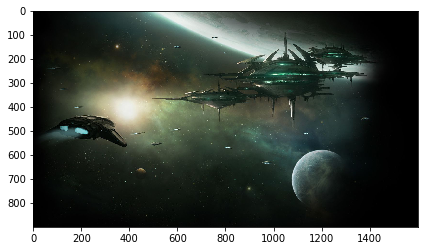

In [ ]:
%matplotlib inline
from skimage.io import imread, imshow
from skimage import img_as_float, img_as_ubyte

img = imread('./P2VaX35rnxf9cGfILAeXSg.jpeg')
img.shape
img = img_as_ubyte(img)
imshow(img)

Y = 0.299 ∗ R + 0.587 ∗ G + 0.114 ∗ B

Cb = −0.1687 ∗ R − 0.3313 ∗ G + 0.5 ∗ B + 128

Cr = 0.5 ∗ R − 0.4187 ∗ G − 0.0813 ∗ B + 128

Выше приведены формулы для перевода RGB в формат YCbCr. В этом формате Y представляет собой картинку в градациях серого (grayscale). 

Переведите картинку в формат YCbCr, используя формулы, описанные выше. Выведите каналы Y, Cb и Cr отдельно.

In [ ]:
img_f = img_as_ubyte(img)
y = 0.299 * img_f[:,:,0] + 0.587 * img_f[:,:,1] + 0.114 * img_f[:,:,2]
cb = -0.1687 * img_f[:,:,0] - 0.3313 * img_f[:,:,1] + 0.5 * img_f[:,:,2] + 128
cr = 0.5 * img_f[:,:,0] - 0.4187 * img_f[:,:,1] - 0.0813 * img_f[:,:,2] + 128
y = y.astype('uint8')
cb = cb.astype('uint8')
cr = cr.astype('uint8')
y_copy = y

В задании 1.1 нужно будет работать только с каналом Y. Предварительно сделайте его копию Y_copy, так как этот канал понадобится нам в задании 1.2 в неизменённом виде.

### Теория

Дан сигнал $X$ предстваляющий собой последовательность значений $x_i$. Для X известно (или может быть легко вычислено) множество допустимых значений. Это множество допустимых значений может быть бесконечным, например, множество действительных чисел.

В задаче квантования элементам последовательности $X$ сопоставить элементы из множества $Y$. При этом множество $Y$ обязательно конечно и включает в себя меньшее чем в $X$ количество различных элементов.

Множесnво $Y$ называют *аппроксимирующим множеством*. Элементы из этого множества называют *аппроксимирующими значениями*.



**Входная последовательность** - исходная последовательность элементов. 

**Квантование** — это разбиение диапазона допустимых значений сигнала $X$ на конечное число уровней и это округление этих значений до ближайших к ним уровней, то есть сопоставлением каждому $x_i$ ближайших к ним аппроксимирующих значений.

**Равномерное квантование** — разбиение диапазона значений отсчётов на отрезки равной длины. Такие отрезки называют *квантами*. При этом обычно аппроксимирующие значения выбираются в центрах этих отрезков. При неравномерном квантовании отрезки могут быть разной длины, а аппроксимирующие значения могут находится не в центрах отрезков.



Обозначим через $Q$ множество номеров квантов. **Квантованная последовательность** - это последовательность номеров квантов, которые соответствуют элементам входной последовательности.

**Восстановленная последовательность** - это последовательность аппроксимирующих значений, соответствующих элементам входной последовательности.

**Скалярное квантование** — одному элементу из $X$ сопоставляется ровно одно аппроксимирующее значение. При векторном квантовании одно аппроксимирующее значение может быть сопоставлено сразу нескольким элементам из $X$. 

В **равномерном квантовании с переменной скоростью** изначально задаётся ширина квантов (обычно её назвают шаг, step). В равномерном квантовании с постоянной скоростью задаётся количество бит, которые нужно потратить на один отчёт в квантованной последовательности. Вычислительно квантование с постоянной скоростью значительно сложнее, так как нужно находить границы квантов и определять, попадает ли элемент входной последовательность внутрь кванта. 


Разберём на примере. Допустим у нас есть grayscale изображение. Яркость пикселей - это входная последовательность. Множество допустимых значений элементов входной последовательность: целые числа от 0 до 255. В результате квантования каждый элемент входной последовательности будет заменён ближайшим элементов их аппроксимирующего множества. 

Получим сначала квантованную последовательность. Для этого нам необходимо задать ширину кванта $step$. В задаче с яркостью изображений ширина кванта задаётся степенью числа $2$. (Фактически в исходном изображении у нас шаг $1$, то есть $2^0$. Допустим, $step = 2^2 = 4$.

Обозначим через $y_q$ - элемент восстановленной последовательности. Тогда, $y_{q}=\left(\left\lfloor {x_i \over step}\right\rfloor +0.5\right)\cdot step$. При этом $\lfloor {x_i \over step} \rfloor$ - это номер соответствующего кванта.

Допустим в исходной последовательности встретились пиксели яркости 71, 73, 74. Тогда соответствующие им номера квантов будут равняться 17, 18, 18, а элементы восстановленной последовательности будут равнятся 70, 74, 74

### Формулировка задания

Напишите алгоритм **равномерного скалярного квантования с переменной скоростью**. Примените его к картинке Y_copy. Выведите получившуюся картинку. Вам потребуется подобрать значение $step$ такое, чтобы качество картинки оставалось приемлемым. Выведите первые 10 элементов входной последовательности, квантованной последовательности, восстановленной последовательности. Выведите элементы аппроксимирующего множества.

value of pixels in: base img; aproximed img; restored img
60 15 62
60 15 62
61 15 62
65 16 66
72 18 74
80 20 82
89 22 90
95 23 94
99 24 98
101 25 102

Restored image:


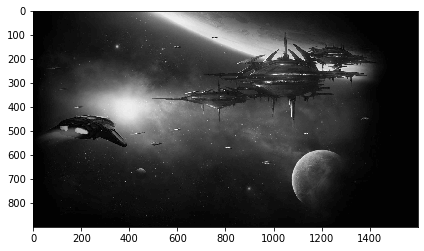

In [ ]:
import numpy as np
step = 4

aproximed_y = y_copy // step
restored_y = (aproximed_y + 0.5) * step
restored_y = restored_y.astype('uint8')


print("value of pixels in: base image; aproximed image; restored image")
for i in range(10):
  print(y_copy[400][i+200], aproximed_y[400][i+200], restored_y[400][i+200])

print("\nRestored image:")
imshow(restored_y)

In [ ]:
print ("aproximed multipiicity:")
print (np.unique(aproximed_y))
print ("\nrestored aproximed multipiicity:")
print (np.unique(restored_y))

aproximed multipiicity:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]

restored aproximed multipiicity:
[  2   6  10  14  18  22  26  30  34  38  42  46  50  54  58  62  66  70
  74  78  82  86  90  94  98 102 106 110 114 118 122 126 130 134 138 142
 146 150 154 158 162 166 170 174 178 182 186 190 194 198 202 206 210 214
 218 222 226 230 234 238 242 246 250 254]


# Задание 1.2

Ранее уже были приведены формулы для перевода из RGB и YCbCr. В этом задании нужно будет работать в основном с каналами Cb и Cr. 

### Теория

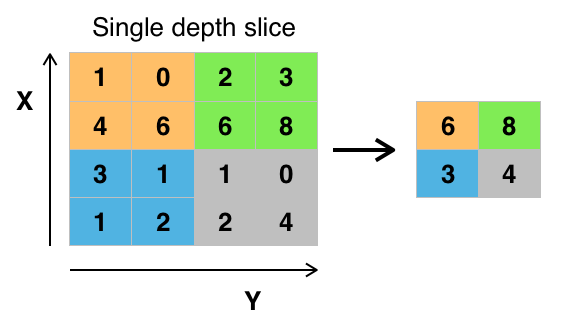

Выше приведена иллюстрация операции, которая называется pooling (точнее max pooling). Эта операция проводится на специальных слоях в свёрточной нейронной сети, предназначенной для анализа изображений. Суть операции сводится к следующему: в исходной матрице выбираются блоки заданного размера (в иллюстрации это блок 2 на 2), в каждом таком блоке выбирается элемент с максимальным значением. Этот максимальный элемент остаётся, а остальные отбрасываются.  

Альтернативой операции max pooling является операция average pooling (в этой операции выбирается не максимальный элемент, а счиается среднее арифметическое, иногда с округлением) 

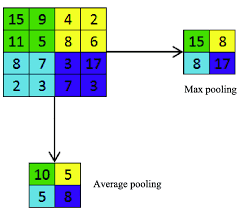

Похожая операция реализуется в стандарте JPEG. Эта часть называется [цветовая субдискретизация](https://ru.wikipedia.org/wiki/%D0%A6%D0%B2%D0%B5%D1%82%D0%BE%D0%B2%D0%B0%D1%8F_%D1%81%D1%83%D0%B1%D0%B4%D0%B8%D1%81%D0%BA%D1%80%D0%B5%D1%82%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F). Наиболее распространённый тип субдискретизации это 4:2:0.

Суть этого подхода к обработке изображений сводится к следующему. Каналы Cb и Cr называются цветоразностными. Для цветоразностных каналов делается децимация (прореживание, то есть отбрасывание элементов исходной матрицы). Для субдискретизации типа 4:2:0 нужно для в цветоразностных каналах для каждого блока 2 на 2 оставить только одно значение. 

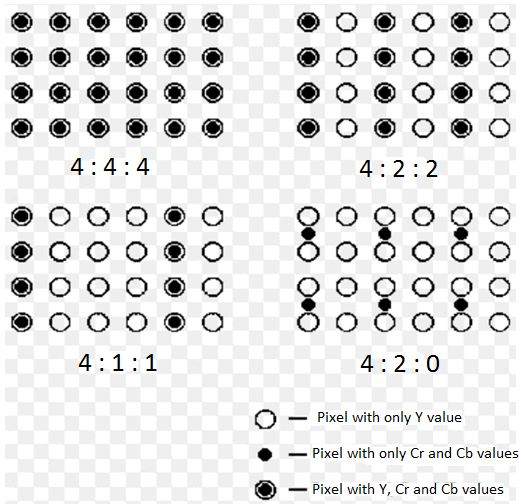

После цветовой субдискретиазации количество элементов в каналах Cb и Cr уменьшится. Для 4:2:0 количество элементов сократится в 4 раза. Чтобы снова перейти от формата YCbCr к RGB нужно восстановить цветоразностные каналы, а затем сделать пересчёт по формулам:

R = Y + 1.402 ∗ (Cr − 128)

G = Y − 0.34414 ∗ (Cb − 128) − 0.71414 ∗ (Cr − 128)

B = Y + 1.772 ∗ (Cb − 128)

## Формулировка задания

Для каналов Cb и Cr нужно сделать цветовую субдискретизацию типа 4:2:0. Нужно реализовать три типа обработки: прореживание (то есть обрасывание всех элементов кроме одного), среднее и максимальное. 

В отдельной функции (методе) реализуйте восстановление цветоразностных каналов. В результате восстановления размеры этих матриц должны стать такими же как у матрицы Y.

После этого переведите изображение из YCbCr в формат RGB и выведите результат на экран. При переводе используйте каналы Cb, Cr, полученные после восстановления, иначе будет несовпадение по размерам.

Всего должно получится 6 картинок. Для неизменённого канала Y должно получиться три картинки для каждого типа обработки при цветовой субдискретизации. Также три картинки должны получится для канала Y после квантования в задании 1.1.

In [ ]:
n, m = img.shape[0], img.shape[1]
div = 2
new_n = n // div
new_m = m // div
thin_cb = np.zeros(shape = (new_n, new_m))
thin_cr = np.zeros(shape = (new_n, new_m))
avg_cb = np.zeros(shape = (new_n, new_m))
avg_cr = np.zeros(shape = (new_n, new_m))
max_cb = np.zeros(shape = (new_n, new_m))
max_cr = np.zeros(shape = (new_n, new_m))
slave = np.zeros(shape = (div, div))
slave2 = np.zeros(shape = (div, div))

for i in range (0, n, div):
  for j in range (0, m, div):
    ii, jj = i //div, j //div
    slave = cb[i:i+div, j:j+div]
    slave2 = cr[i:i+div, j:j+div]
    thin_cb[ii][jj], thin_cr[ii][jj] = slave[0][0], slave2[0][0]
    avg_cb[ii][jj], avg_cr[ii][jj] = slave.mean(), slave2.mean()
    max_cb[ii][jj], max_cr[ii][jj] = slave.max(), slave2.max()

In [ ]:
def rebuild(np_in, k, nn, mm):
  ans = np.zeros(shape = (nn * k, mm * k))
  for i in range (nn):
    for j in range (mm):
      for dop_i in range(k):
        for dop_j in range(k):
          ans[i * k + dop_i][j * k + dop_j] = np_in[i][j]
  return ans

def show_rebuild_img(y_in, cb_in, cr_in):
  r = y_in + 1.402 * (cr_in - 128)
  g = y_in - 0.34414 * (cb_in - 128) - 0.71414 * (cr_in - 128)
  b = y_in + 1.772 * (cb_in - 128)
  ans = np.dstack((r, g, b))
  ans = np.clip(ans, 0, 255)
  ans = ans.astype('uint8')
  return ans

img_arr =[]
img_arr.append(aproximed_y)

img_arr.append(show_rebuild_img (y, rebuild(thin_cb, div, new_n, new_m), rebuild(thin_cr, div, new_n, new_m)))
img_arr.append(show_rebuild_img (y, rebuild(avg_cb, div, new_n, new_m), rebuild(avg_cr, div, new_n, new_m)))
img_arr.append(show_rebuild_img (y, rebuild(max_cb, div, new_n, new_m), rebuild(max_cr, div, new_n, new_m)))

work_y = restored_y
img_arr.append(show_rebuild_img (work_y, rebuild(thin_cb, div, new_n, new_m), rebuild(thin_cr, div, new_n, new_m)))
img_arr.append(show_rebuild_img (work_y, rebuild(avg_cb, div, new_n, new_m), rebuild(avg_cr, div, new_n, new_m)))
img_arr.append(show_rebuild_img (work_y, rebuild(max_cb, div, new_n, new_m), rebuild(max_cr, div, new_n, new_m)))

for i in range(7):
  img_arr[i] = img_as_ubyte(img_arr[i])


In [ ]:
titles = ["greyscale image:",
          "thin pooling:", "average pooling:",
          "max pooling:", "thin pooling of restored image:",
          "average pooling of restored image:", "max pooling of restored image:"]

thin pooling:


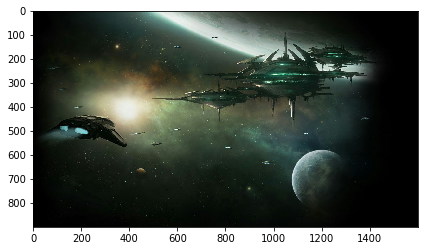

In [ ]:
print (titles[1])
imshow(img_arr[1])

average pooling:


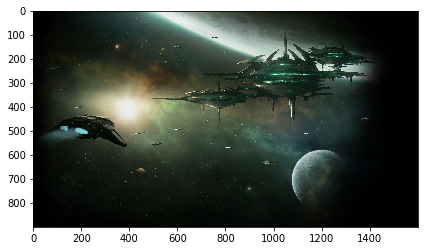

In [ ]:
print (titles[2])
imshow(img_arr[2])

max pooling:


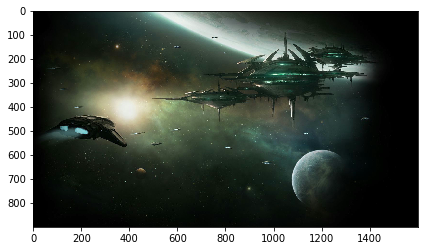

In [ ]:
print (titles[3])
imshow(img_arr[3])

thin pooling of restored image:


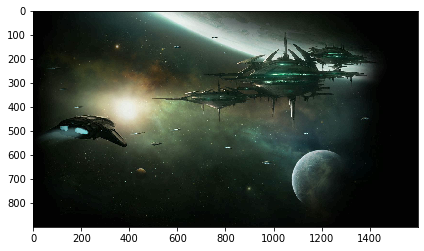

In [ ]:
print (titles[4])
imshow(img_arr[4])

average pooling of restored image:


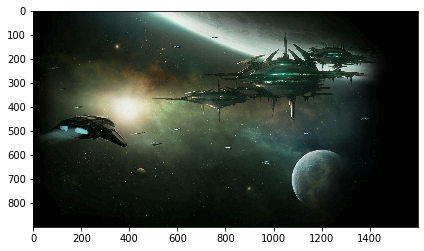

In [ ]:
print (titles[5])
imshow(img_arr[5])

max pooling of restored image:


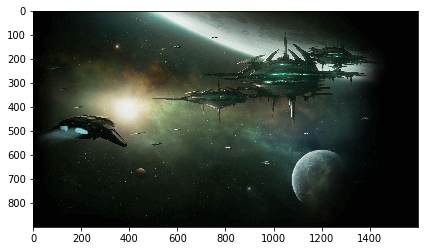

In [ ]:
print (titles[6])
imshow(img_arr[6])

# Задание 3

В этом задании нужно будет оценить качество сжатия данных. Оценивать будем каждую из шести картинок по двум параметрам: RMSE и степень сжатия (через энтропию).

## Теория

MSE и её модификация RMSE (корень квадратный из MSE) - метрики часто использующиеся в разных областях. В частности, их используют в статистики и машинном обучении для оценки качества регрессионной модели.

$$MSE =  \frac{1}{\ell} \sum\limits_{i=1}^\ell (\hat y_{i}  - y_{i})^2 $$

Здесь $\ell$ количество пикселей в картинке (и в исходной и после обработки), $\hat y_{i}$  и $y_{i}$ - яркости пикселей в исходной картинке и в картинке после обработки.

Степень сжатия рассчитывается по формуле:

$C = \frac{H_y}{H_{\hat y}}$

$H_y$ - это среднее количество бит на один пиксель в исходном изображении. В этом задании это долно быть 24 бита.

$H_{\hat y}$ - это оценка среднего количества бит на один пиксель в изображении после обработки.


Для оценки $H_{\hat y}$ потребуется вычисление энтропию для последовательности элементов. Также это значение должно учитывать проведённую в задании 1.2 субдискретизацию. То есть **вы должны рассчитывать среднее количество бит не на восстановленном изображении, а на закодированном**. Помните о том, что в закодированном изображении количество элементов матрицы в два раза меньше.

Энтропия Шеннона для системы с N возможными состояниями определяется по формуле:
$$H = - \sum_{i=0}^{N} p_i\log_2p_i $$

где $p_i$ – вероятности нахождения системы в $i$-ом состоянии. Вероятность может быть оценена через частоту.

Это очень важное понятие теории информации, которое позволяет оценить количество информации (степень хаоса в системе). Чем выше энтропия, тем менее упорядочена система и наоборот. С помощью энтропии мы рассчитывем среднее количество бит на элемент последовательности, при условии что эту последовательность получится оптимально закодировать.

Энтропия важно понятие и для машинного обучения. Например, с её помощью формализуют функционал качества для разделение выборки при построении решающих деревьев, а кросс-энтропия используется как функционал качества при обучении (настройки параметров) разных моделей, в том числе нейронных сетей.

Приведём код для вычисления энтропии:

In [ ]:
def entropy(x):
    _, counts = np.unique(x, return_counts=True)

    probabilities = counts / counts.sum()

    return np.sum(probabilities * -np.log2(probabilities))

In [ ]:
s = [0, 1, 0, 1, 0, 1]
print (entropy(s))

2.584962500721156


In [ ]:
s = [0, 1, 2, 3, 0, 1, 3, 2]
print (entropy(s))

2.0


In [ ]:
s = [0, 0, 0, 0, 0, 1]
print (entropy(s))

0.6500224216483541


In [ ]:
s = [0, 0, 2, 2, 0, 0, 2, 2]
print (entropy(s))

1.0


## Формулировка задания

Для изображения в формате grayscale в задании 1.1 рассчитайте степень сжатия и MSE.

Для каждой их 6 картинок вычислите RMSE и степень сжатия. Выведите результат в удобочитаемом формате.



In [ ]:
def entropy_img(y, cb, cr):
  return entropy(y) + entropy(cb) / 4 + entropy(cr) / 4

def rmse(img1, img2):
  l = (img1.shape[0] * img1.shape[1])

  mse = np.sum((img1 - img2) ** 2) / l
  return np.sqrt(mse)


In [ ]:
h_const = 24
ans = [0, 0, 0, 0, 0, 0, 0]

ans[0] = entropy(work_y)
ans[1] = entropy_img(y, thin_cb, thin_cr)
ans[2] = entropy_img(y, avg_cb, avg_cr)
ans[3] = entropy_img(y, max_cb, max_cr)
ans[4] = entropy_img(work_y, thin_cb, thin_cr)
ans[5] = entropy_img(work_y, avg_cb, avg_cr)
ans[6] = entropy_img(work_y, max_cb, max_cr)

print (titles[0])
print ("Compression ratio:   ", entropy(y) / ans[0])
print ("RMSE:                ", rmse(y, restored_y))
print ("\n")

for i in range(1, 7):
  print (titles[i])
  print ("Compression ratio:   ", h_const / ans[i])
  print ("RMSE:                ", rmse(img, img_arr[i]))
  print ("\n")

greyscale image:
Compression ratio:    1.3821723326616577
RMSE:                 1.335039273246713


thin pooling:
Compression ratio:    2.7977053315636597
RMSE:                 2.70258531060744


average pooling:
Compression ratio:    2.7264698057627457
RMSE:                 2.636920684139825


max pooling:
Compression ratio:    2.7988677787868292
RMSE:                 2.59299697904439


thin pooling of restored image:
Compression ratio:    3.57759568958431
RMSE:                 2.9473899706161872


average pooling of restored image:
Compression ratio:    3.461930267835744
RMSE:                 2.88989607175683


max pooling of restored image:
Compression ratio:    3.5794967771697466
RMSE:                 2.871800272573905




Картинка сжималась путём снижения яркостного разрешения (в задании 1.1) и путём цветовой субдисрктизации (задание 1.2).. Какой из этих методов дал наибольший вклад в сжатие данных? Какой их этих методов внёс наибольшую ошибку? 
Какой тип типа обработки при цветовой субдискретизации оказался наиболее эффективным?

Ответы напишите ниже.

В целом сжатие получилось незначительным, ошибка тоже.
Субцветовая дискретизация внесла больший вклад, чем снижение яркостного разрешения, скорее всего потому что влияла на два канала, а не на один, потому что коэффициент уменьшения количества значений был один (4). С ошибкой ситуация аналогичная.

Эффективность метода взятия максимального почти неразличима от других, но всё же есть. Это, скорее всего, отражает действительность, потому что мы берем слишком небольшое количество пикселей, и не играет особой роли то, по какому принципу мы их отбираем.